# **1. Konten**
* [1 Konten](#intro)
* [2 Problem Statement](#data_review)
* [3 Deskripsi Data](#data_review)
* [4 Tujuan Analisis](#data_review)
* [Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum](#data_review)
* [Tahap 2. Analisis Data](#data_review)
    * [Identifikasi Persentase Dari Berbagai Jenis Cafe-Restoran](#data_review)
    * [Identifikasi Persentase Dari Usaha Berbasis Waralaba Dan Nonwaralaba](#data_review)
    * [Jumlah Proporsi Dan Rata-Rata Kursi Untuk Setiap Jenis Usaha Berbasis Waralaba](#data_review)    
    * [Identifikasi Jenis Unit Usaha Berdasarkan Lokasi](#data_review)
    * [Distribusi Jumlah Kursi Untuk Lokasi Dengan Banyak Unit Usaha](#data_review)
    * [Kesimpulan Umum](#data_review)
* [Kesimpulan Umum](#data_review)
* [Tautan Ke PPT](#data_review)

# **1. Problem Statement**

Setelah mempertimbangkan dengan cermat, kami memutuskan untuk membuka sebuah kafe kecil di Los Angeles yang memiliki konsep unik, yaitu menggunakan robot sebagai pelayan atau pramusaji. Kami percaya bahwa ide ini memiliki potensi yang besar, namun juga membutuhkan modal yang signifikan. Oleh karena itu, kami dan para mitra kami memutuskan untuk mencari minat investor.

Investor kami tertarik dengan kondisi pasar saat ini, tetapi mereka juga menanyakan apakah kami mampu mempertahankan kesuksesan saat daya tarik robot mulai berkurang. Sebagai seorang pakar analisis, kami telah melakukan riset pasar yang komprehensif dengan menggunakan data dari sumber terbuka tentang jenis-jenis usaha makanan di Los Angeles.

Dengan informasi yang kami kumpulkan, kami dapat menyimpulkan bahwa pasar makanan di Los Angeles sangat dinamis dan kompetitif. Ada berbagai jenis usaha makanan yang sukses, mulai dari restoran klasik, warung kopi modern, hingga kafe dengan konsep unik seperti milik kami. Namun, kami juga menyadari bahwa tren dan preferensi konsumen dapat berubah seiring waktu.

Untuk menjaga kesuksesan kafe kami, kami berencana untuk mengadopsi strategi yang terfokus pada pengalaman pelanggan yang unik dan layanan yang superior. Meskipun daya tarik robot kami mungkin pudar di masa depan, kami akan tetap berkomitmen untuk menyediakan makanan berkualitas tinggi, suasana yang nyaman, dan pelayanan yang ramah. Selain itu, kami akan terus mengikuti perkembangan tren dan kebutuhan pasar agar dapat beradaptasi dengan cepat.

Kami juga menyadari pentingnya inovasi dalam bisnis kami. Selain mempertahankan robot sebagai pelayan, kami akan terus mencari cara baru untuk meningkatkan pengalaman pelanggan, seperti penggunaan teknologi yang lebih canggih, menu yang disesuaikan dengan preferensi pelanggan, dan program loyalitas yang menarik.

Kami percaya bahwa dengan kombinasi strategi yang tepat, komitmen terhadap kualitas, dan kemampuan untuk beradaptasi, kami dapat mempertahankan kesuksesan kafe kami di tengah perubahan pasar. Kami berharap dapat mengundang minat dan dukungan investor yang berbagi visi kami dalam menciptakan sebuah kafe yang unik dan menarik di Los Angeles.

Selain itu, mengingat kami adalah seorang pakar analisis, para mitra pun mendukung upaya kami untuk meyakinkan mereka dalam mempersiapkan sejumlah riset pasar. Saat ini kami memiliki data dari sumber terbuka (*open source*) terkait jenis-jenis usaha tempat makan di LA.

# **3. Deskripsi Data**

Berikut ini adalah informasi terkait setiap kolom dari tabel **rest_data** yang berisi informasi tentang usaha restoran:

* object_name: Nama restoran
* chain: Apakah usaha ini berbasis waralaba atau tidak (True/False)
* object_type: Kategori atau jenis usaha restoran
* address: Alamat lokasi restoran
* number : Jumlah kursi yang tersedia di restoran tersebut

Tabel ini memberikan informasi yang mudah dipahami tentang berbagai restoran, termasuk apakah mereka merupakan waralaba atau bukan, jenis usaha mereka, alamat lokasi, dan kapasitas kursi yang tersedia

# **3. Tujuan Analisis**

Tujuan analisis yang kami lakukan adalah untuk memberikan pemahaman yang lebih mendalam tentang kondisi pasar restoran dan kafe di Los Angeles

# **Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum**

In [1]:
from scipy import stats as st
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.patches as mpatches

In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Memuat dataframe
rest_data = pd.read_excel('/kaggle/input/restoran-data-us/rest_data_us.xlsx')
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,0.0,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,0.0,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,0.0,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,0.0,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,0.0,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,0.0,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,0.0,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,1.0,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,0.0,Cafe,6


In [4]:
# memuat informasi umum dataframe "rest_data"

rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9651 non-null   int64  
 1   object_name  9651 non-null   object 
 2   address      9651 non-null   object 
 3   chain        9648 non-null   float64
 4   object_type  9651 non-null   object 
 5   number       9651 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 452.5+ KB


In [5]:
# identifikasi baris data yang null

rest_data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

**Kesimpulan :**

* Terdapat 3 baris data yang hilang pada kolom **chain**
* Mengisi nilai baris yang null dengan pendekatan modus dari kolom tersebut

In [6]:
# mengisi nilai baris yang null pada kolom chain

rest_data['chain'].fillna(rest_data['chain'].mode, inplace=True)

# mengubah setiap nilai dalam kolom 'chain' menjadi tipe data boolean
rest_data['chain'] = rest_data['chain'].apply(lambda x: bool(x))
rest_data.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [7]:
# identifikasi duplikat pada data

duplikat = rest_data[rest_data.duplicated(keep=False)]
duplikat

,id,object_name,address,chain,object_type,number


# **Tahap 2. Analisis Data**

## **Identifikasi Persentase Dari Berbagai Jenis Cafe-Restoran**

In [8]:
# Menghitung jumlah id per object_type
jumlah_id_per_object_type = rest_data.groupby('object_type')['id'].count()

# Menghitung persentase masing-masing object_type
persentase_object_type = (jumlah_id_per_object_type / jumlah_id_per_object_type.sum())*100
persentase_object_type = persentase_object_type.round(2)

# Membuat dataframe baru yang berisi jumlah id dan persentase per object_type
summary_data = pd.DataFrame({'count': jumlah_id_per_object_type, 'percentage(%)': persentase_object_type}).reset_index()

# Menampilkan hasil
summary_data.sort_values('count', ascending=False)

,object_type,count,percentage(%)
5,Restaurant,7255,75.17
3,Fast Food,1066,11.05
2,Cafe,435,4.51
4,Pizza,320,3.32
1,Bar,292,3.03
0,Bakery,283,2.93


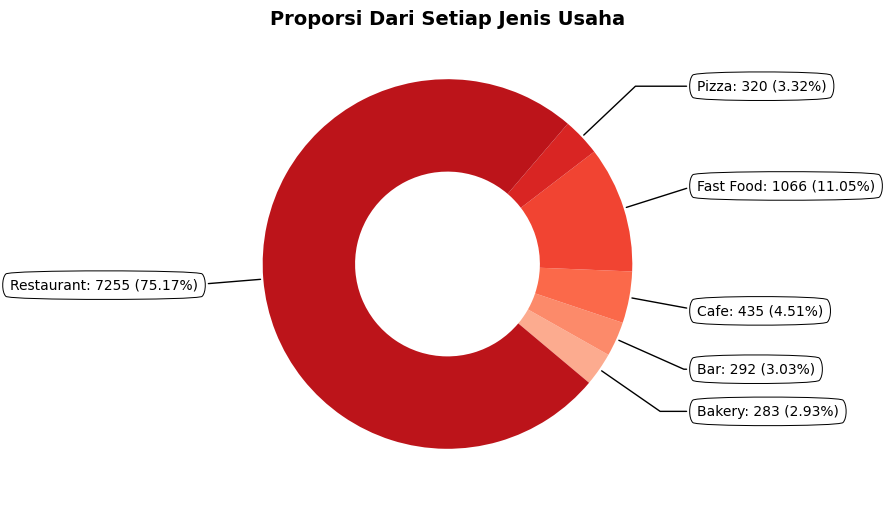

In [9]:
# mengambil indeks dari Series jumlah_id_per_object_type dan mengubahnya menjadi list
object_type_index = jumlah_id_per_object_type.index.tolist()

# mengambil elemen-elemen dari variabel establishment, object_type, dan percentage
elemen = []
for i in range(len(object_type_index)):
    elemen.append(object_type_index[i]+": "+ str(jumlah_id_per_object_type[i])+" ("+str(persentase_object_type[i])+'%)')

# memvisualisasikan temuan
fig, ax1 = plt.subplots(figsize=(20, 6), subplot_kw=dict(aspect="equal"))

# mengatur warna
a, b = [plt.cm.Blues, plt.cm.Reds]
colors_ = [b(.3), b(.4), b(.5), b(.6), b(.7), b(.8)]

# mengatur properti visual dan label
wedges, texts = ax1.pie(jumlah_id_per_object_type, wedgeprops=dict(width=0.5), startangle=-40, colors = colors_)

label_lines = dict(boxstyle="round4,pad=0.6", fc="w", ec="k", lw=0.72)

# mengatur properti anotasi pada plot
prop = dict(arrowprops=dict(arrowstyle="-"), bbox=label_lines, zorder=0, va="center")

for i, p in enumerate(wedges):
    angle = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    prop["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(elemen[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **prop)

ax1.set_title("Proporsi Dari Setiap Jenis Usaha", fontsize=14, fontweight='semibold')
plt.show()

**Kesimpulan :**

Pada posisi pertama dengan proporsi 75% dari jenis usaha di LA adalah restoran, disusul oleh makanan cepat saji sebagai jenis tempat usaha paling umum berikutnya (~10%). Sebaliknya, Cafe ternyata hanya menempati posisi ke-3 terbawah dengan hanya 5% jumlah total keseluruhan di LA. Mungkin saja ini peluang yang cukup baik mengingat rendahnya jumlah kompetitor.

## **Identifikasi Persentase Dari Usaha Berbasis Waralaba Dan Nonwaralaba**

In [10]:
# menghitung proporsi relatif dari setiap nilai pada kolom chain

rest_data['chain'].value_counts(normalize=True)

chain
False    0.618796
True     0.381204
Name: proportion, dtype: float64

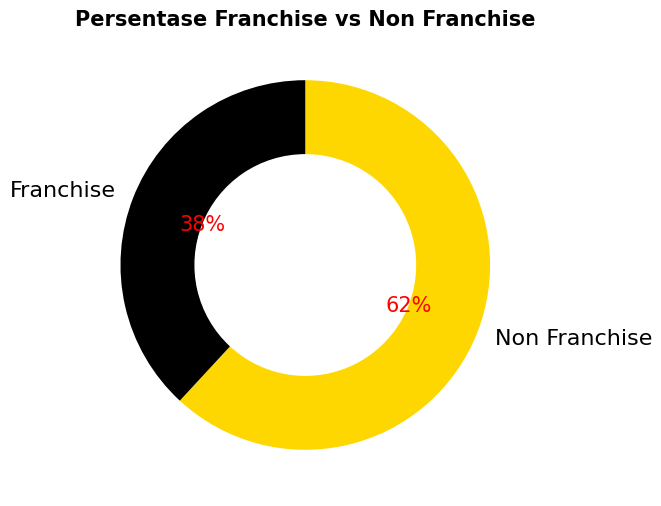

In [11]:
# Menghitung persentase dari setiap nilai dalam kolom 'chain'
chain_counts = rest_data['chain'].value_counts(normalize=True) * 100

# Mengubah nilai False menjadi 'Non Franchise' dan True menjadi 'Franchise'
chain_counts.index = ['Non Franchise', 'Franchise']

# Membuat donat chart
fig, ax = plt.subplots(figsize=(20, 6))
colors = ['gold', 'black']  # Warna biru dan oranye
wedges, labels, autopcts = ax.pie(chain_counts, labels=chain_counts.index, autopct='%1.0f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.4}, colors=colors)

# Menyesuaikan ukuran label pada pie chart
plt.setp(labels, size=16)

# Menambahkan judul pada chart
ax.set_title('Persentase Franchise vs Non Franchise', fontsize=15, fontweight='semibold')

# Mengatur warna teks pada anotasi menjadi oranye
plt.setp(autopcts, size=15, color='red')

# Menampilkan chart
plt.show()

**Kesimpulan :**

Ternyata franchise hanya menguasi kurang dari 50% pangsa pasar restoran di LA. Dimana data kami menunjukkan bahwa sekitar 2/3 dari jenis usaha di LA tidak berbasis franchise. Terdapat indikasi bahwa sejumlah besar konsumen mungkin mencari pengalaman yang unik, cita rasa yang khas, atau dukungan untuk usaha kecil lokal.

**Kami akan melanjutkan untuk mengidentifikasi jenis usaha apa saja yang biasanya merupakan usaha berbasis waralaba**

In [12]:
# mengelompokkan data berdasarkan kombinasi nilai unik dalam kolom 'chain' dan 'object_type',

franchise_rest_pivot = pd.pivot_table(rest_data,index=['chain','object_type'],values='id',aggfunc='count')
franchise_rest_pivot

id
chain object_type      
False Bar           215
      Cafe          169
      Fast Food     461
      Pizza         166
      Restaurant   4961
True  Bakery        283
      Bar            77
      Cafe          266
      Fast Food     605
      Pizza         154
      Restaurant   2294

In [13]:
# Menghitung persentase jumlah (count) id untuk kolom 'chain' yang bernilai True

franchise_data = rest_data[rest_data['chain'] == True]
franchise_counts = franchise_data.groupby('object_type')['id'].count()
total_counts = rest_data.groupby('object_type')['id'].count()

# membuat dataframe percentage_franchise
# Menggabungkan franchise_counts dan total_counts ke dalam percentage_franchise
percentage_franchise = franchise_counts.to_frame(name='franchise_count').merge(total_counts.to_frame(name='total_count'), on='object_type', how='left')

# Menghitung persentase franchise
percentage_franchise['percentage_franchise(%)'] = (percentage_franchise['franchise_count'] / percentage_franchise['total_count']) * 100
percentage_franchise['percentage_franchise(%)'] = percentage_franchise['percentage_franchise(%)'].round(1)

# Mengurutkan DataFrame berdasarkan persentase franchise secara menurun
percentage_franchise.sort_values(by='percentage_franchise(%)', ascending=False, inplace=True)
percentage_franchise = percentage_franchise.reset_index()
percentage_franchise

,object_type,franchise_count,total_count,percentage_franchise(%)
0,Bakery,283,283,100.0
1,Cafe,266,435,61.1
2,Fast Food,605,1066,56.8
3,Pizza,154,320,48.1
4,Restaurant,2294,7255,31.6
5,Bar,77,292,26.4


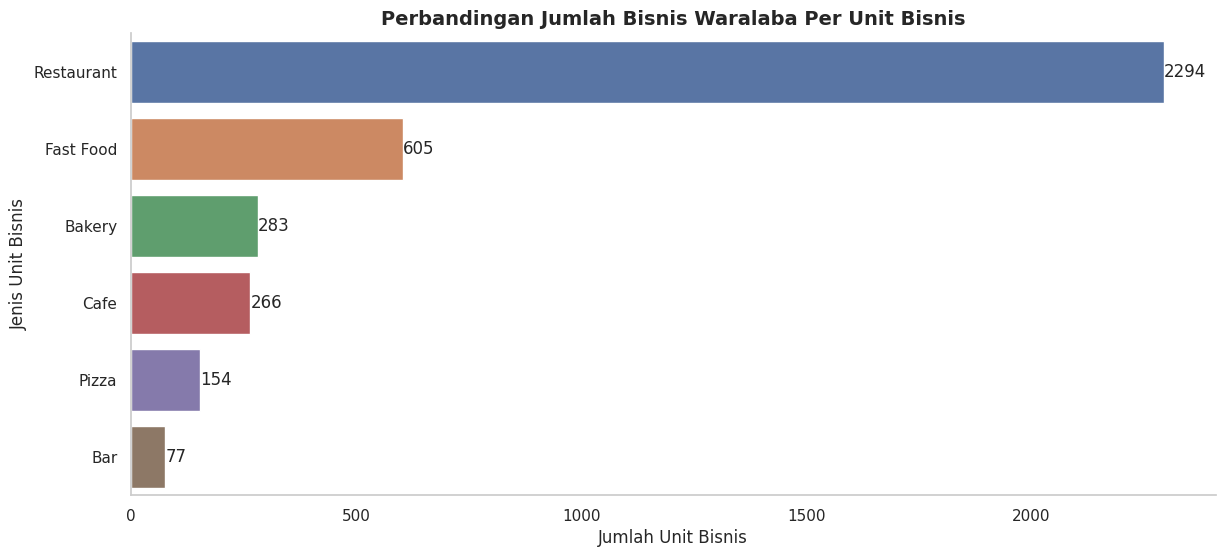

In [14]:
# identifikasi jumlah bisnis franchise per jenis unit usaha

franchise_count_sort = percentage_franchise.sort_values('franchise_count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='franchise_count', y='object_type', data=franchise_count_sort)

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Jumlah Unit Bisnis')
plt.ylabel('Jenis Unit Bisnis')
ax.set_title('Perbandingan Jumlah Bisnis Waralaba Per Unit Bisnis', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

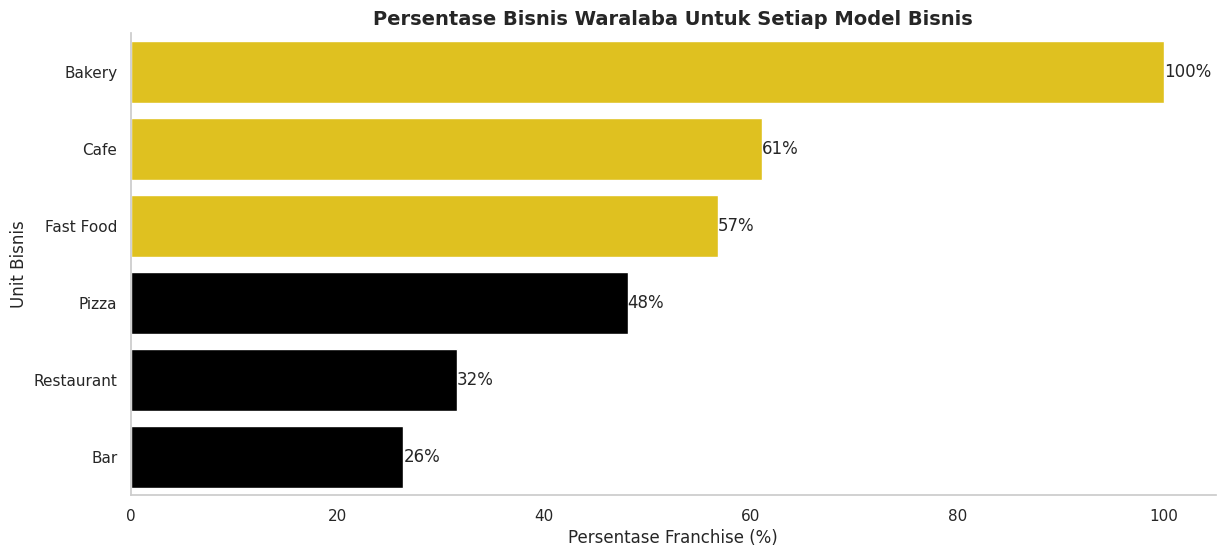

In [15]:
# identifikasi persentase jumlah usaha waralaba di LA

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
colors = ['black' if val <= 50 else 'gold' for val in percentage_franchise['percentage_franchise(%)']]
ax = sns.barplot(x='percentage_franchise(%)', y='object_type', data=percentage_franchise, palette=colors)

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}%', ha='left', va='center')

plt.xlabel('Persentase Franchise (%)')
plt.ylabel('Unit Bisnis')
ax.set_title('Persentase Bisnis Waralaba Untuk Setiap Model Bisnis', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

**Kesimpulan :**

Grafik menunjukkan bahwa sebagian besar unit bisnis yang mengadopsi konsep waralaba adalah restoran. Ini disebabkan oleh fakta bahwa sekitar 2/3 dari bisnis makanan dan minuman di LA adalah restoran. Namun, jika dibandingkan dengan total jumlah restoran yang ada, hanya sekitar 30% yang berbentuk waralaba.

Di sisi lain, jenis usaha kafe di LA ternyata banyak yang menggunakan konsep waralaba. Dimana 60% dari keseluruhan total bisnis Cafe di LA merupakan bisnis waralaba. Sebagai rekomendasi, manajemen dapat mempertimbangkan untuk memulai kafe sebagai bisnis independen tanpa waralaba, dan kemudian di masa depan, menjual konsep bisnis ini sebagai model waralaba yang memungkinkan pihak lain untuk menggunakan merek dagang tersebut.

Selanjutnya, kami akan mempelajari ciri-ciri dari jenis usaha berbasis waralaba, apakah mereka biasanya memiliki jumlah kursi yang sedikit atau malah beberapa bisnis memiliki jumlah kursi yang lebih banyak?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x600 with 0 Axes>

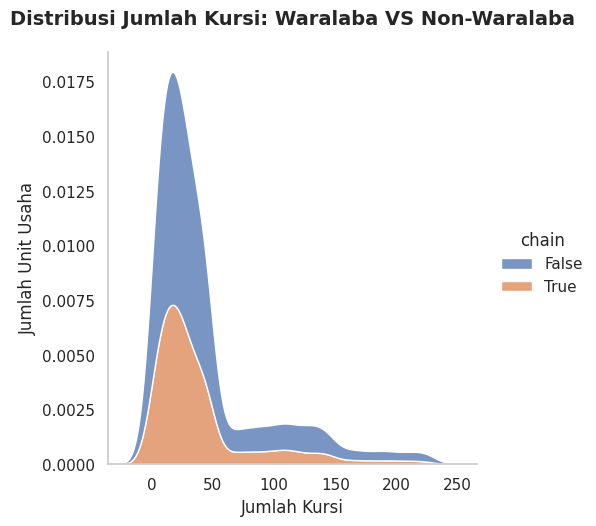

mean, median, modus (waralaba)
0    12
Name: number, dtype: int64
            id  number
count   3679.0  3679.0
mean   16628.5    39.7
std     2747.7    43.4
min    11794.0     1.0
25%    14284.0    13.0
50%    16628.0    25.0
75%    19020.5    44.0
max    21436.0   229.0


mean, median, modus (non-waralaba)
0    5
Name: number, dtype: int64
            id  number
count   5972.0  5972.0
mean   16600.2    46.2
std     2809.7    49.9
min    11786.0     1.0
25%    14158.8    14.0
50%    16598.5    28.0
75%    19026.2    47.0
max    21435.0   229.0


In [16]:
# identifikasi jumlah kursi untuk unit usaha waralaba vs non-waralaba

plt.figure(figsize=(15, 6))
sns.displot(rest_data, x="number", hue="chain", kind="kde", multiple="stack")
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Unit Usaha')
plt.title('Distribusi Jumlah Kursi: Waralaba VS Non-Waralaba', fontsize=14, pad=20, fontweight='semibold')
plt.grid(False)  # Menghilangkan grid
plt.show()

# mean, median, modus (waralaba)
print('mean, median, modus (waralaba)')
chain_true_data = rest_data[rest_data['chain'] == True]
print(rest_data[rest_data['chain'] == True]['number'].agg('mode'))
print(chain_true_data.describe().round(1))
print()
print()

# mean, median, modus (non-waralaba)
print('mean, median, modus (non-waralaba)')
chain_false_data = rest_data[rest_data['chain'] == False]
print(rest_data[rest_data['chain'] == False]['number'].agg('mode'))
print(chain_false_data.describe().round(1))

**Kesimpulan :**
    
Data kami menunjukkan bahwa terdapat beberapa segmen bisnis FnB besar dengan outlet yang memiliki kapasitas hingga 250 kursi. Namun, sebagian besar bisnis FnB di LA tetap didominasi oleh pemain bisnis kecil dengan outlet yang hanya menyediakan maksimal 50 kursi. Meskipun begitu, kami tidak menemukan perbedaan yang signifikan antara bisnis waralaba dan non-waralaba dalam hal proporsi jumlah kursi, jika mempertimbangkan faktor ini.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

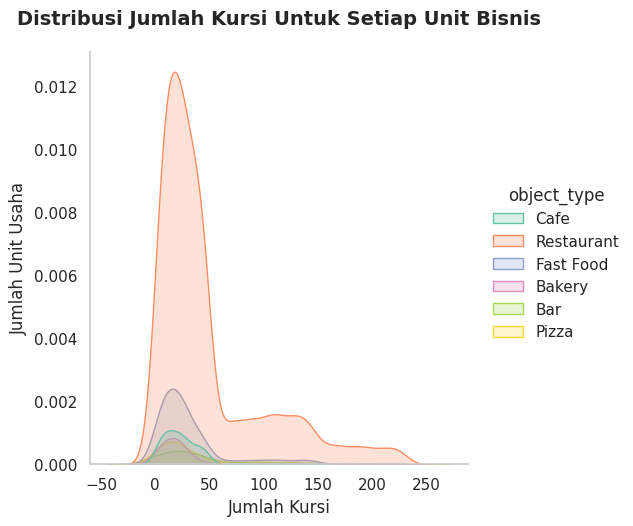

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

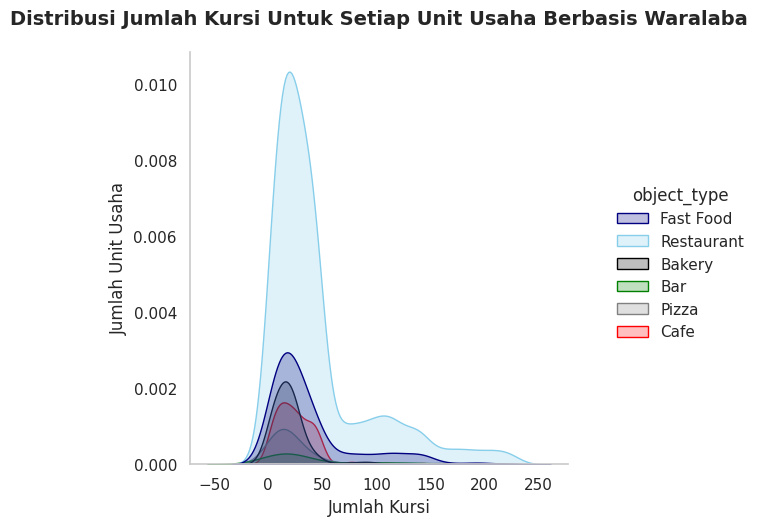

In [17]:
# identifikasi perbandingan jumlah kursi untuk setiap unit bisnis (waralaba & non-waralaba)

plt.figure(figsize=(25, 6))
sns.displot(rest_data, x="number", hue="object_type", kind="kde", fill=True, palette="Set2")
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Unit Usaha')
plt.title('Distribusi Jumlah Kursi Untuk Setiap Unit Bisnis', fontsize=14, pad=20, fontweight='semibold')
plt.grid(False)  # Menghilangkan grid
plt.show()

# identifikasi perbandingan jumlah kursi untuk setiap unit usaha berbasis waralaba

colors = ["navy", "skyblue", "black", "green", "grey", "red"]
plt.figure(figsize=(25, 6))
sns.set_palette(colors)  # Menggunakan palet warna yang telah ditentukan
sns.displot(chain_true_data, x="number", hue="object_type", kind="kde", fill=True)
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Unit Usaha')
plt.title('Distribusi Jumlah Kursi Untuk Setiap Unit Usaha Berbasis Waralaba', fontsize=14, pad=20, fontweight='semibold')
plt.grid(False)  # Menghilangkan grid
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x600 with 0 Axes>

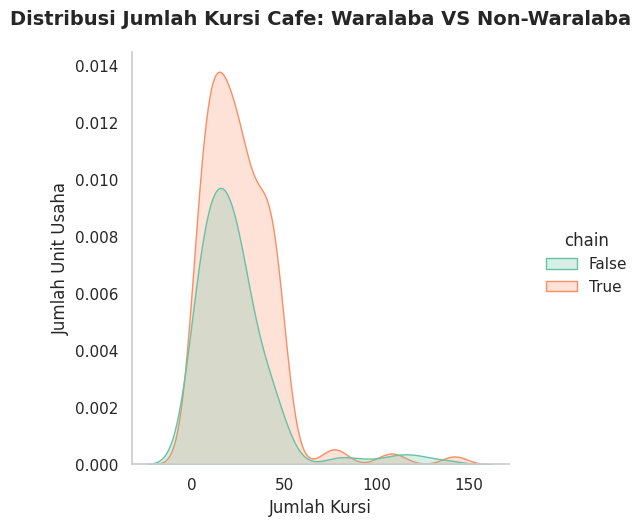

nilai modus, mean dan median untuk cafe waralaba
0    7
Name: number, dtype: int64
            id  number
count    266.0   266.0
mean   17894.3    25.9
std     2461.9    20.3
min    11909.0     1.0
25%    16450.0    12.0
50%    18162.5    22.0
75%    19926.2    36.8
max    21359.0   143.0


nilai modus, mean dan median untuk cafe non-waralaba
0    5
Name: number, dtype: int64
            id  number
count    169.0   169.0
mean   16985.6    23.6
std     2991.0    22.8
min    11786.0     1.0
25%    14759.0     9.0
50%    16910.0    19.0
75%    19758.0    28.0
max    21435.0   138.0


In [18]:
# identifikasi jumlah kursi untuk unit usaha cafe waralaba vs cafe non-waralaba

cafe_df = rest_data[rest_data['object_type'] == 'Cafe']
plt.figure(figsize=(15, 6))
sns.displot(cafe_df, x="number", hue="chain",  kind="kde", fill=True, palette="Set2")
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Unit Usaha')
plt.title('Distribusi Jumlah Kursi Cafe: Waralaba VS Non-Waralaba', fontsize=14, pad=20, fontweight='semibold')
plt.grid(False)  # Menghilangkan grid
plt.show()

# identifikasi informasi umum untuk data cafe waralaba
cafe_franchise = rest_data[rest_data['chain'] == True]
cafe_franchise = cafe_franchise[cafe_franchise['object_type'] == 'Cafe']
print('nilai modus, mean dan median untuk cafe waralaba')
print(cafe_franchise['number'].agg('mode'))
print(cafe_franchise.describe().round(1))
print()
print()

# identifikasi informasi umum untuk data cafe nonwaralaba
cafe_nonfranchise = rest_data[rest_data['chain'] == False]
cafe_nonfranchise = cafe_nonfranchise[cafe_nonfranchise['object_type'] == 'Cafe']
print('nilai modus, mean dan median untuk cafe non-waralaba')
print(cafe_nonfranchise['number'].agg('mode'))
print(cafe_nonfranchise.describe().round(1))

**Kesimpulan :**

Data kami menunjukkan bahwa distribusi jumlah kursi pada berbagai jenis usaha waralaba dan non-waralaba memiliki kecenderungan skewness negatif, dimana rentang jumlah kursi berkisar antara 1 hingga 229 kursi, dengan standar deviasi yang sangat tinggi sebesar 43 kursi (untuk konsep waralaba) & 50 kursi (untuk konsep non-waralaba).

Selain itu, tidak ada perbedaan yang signifikan dalam pola distribusi jumlah kursi antara seluruh jenis varian bisnis waralaba dan bisnis non-waralaba, termasuk secara spesifik untuk jenis usaha kafe dengan konsep waralaba maupun non-waralaba.

Berdasarkan seluruh pertimbangan yang ada, kami akan mengkategorikan data menjadi 2 kelompok, dimana unit usaha dengan jumlah kursi <= 50 merupakan kategori *few seats <= 50*, sedangkan diatas 50 dikategorikan sebagai *more seats > 50*

In [19]:
# menambahkan kolom baru (seat_category) pada dataframe asli

rest_data['seat_category'] = rest_data['number'].apply(lambda x: 'few seats <= 50' if x <= 50 else 'more seats > 50')
rest_data.head()

,id,object_name,address,chain,object_type,number,seat_category
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,few seats <= 50
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,few seats <= 50
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,few seats <= 50
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,few seats <= 50
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,few seats <= 50


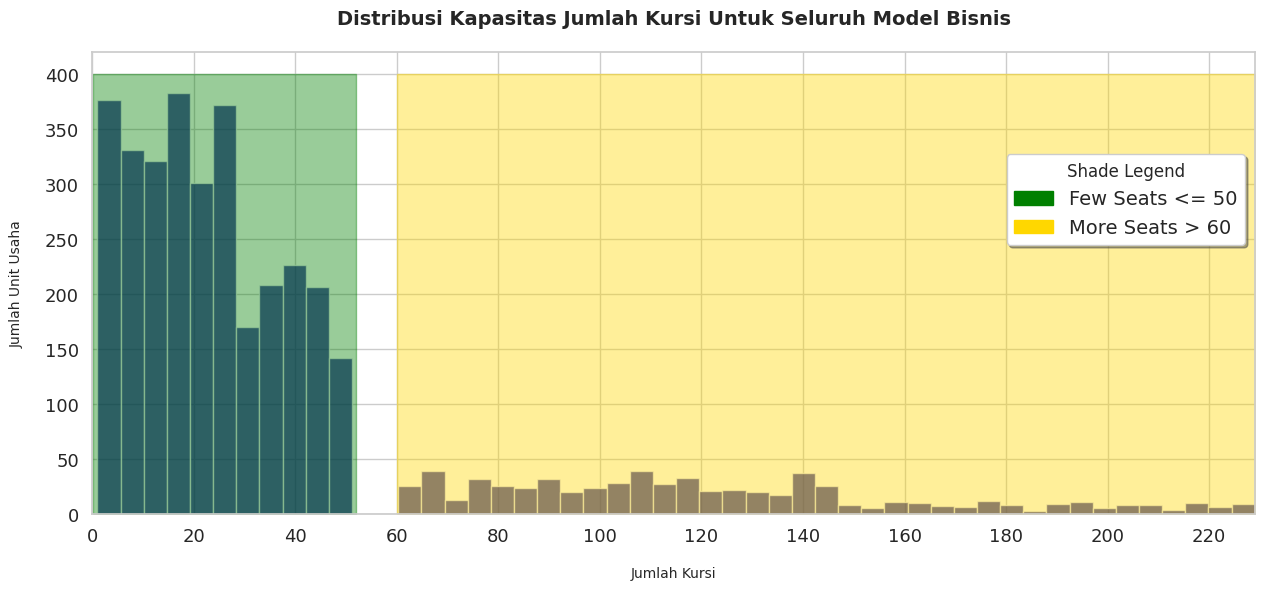

Karakteristik jumlah kursi pada usaha waralaba:
seat_category
few seats <= 50    0.825224
more seats > 50    0.174776
Name: proportion, dtype: float64


In [20]:
num_chain_true = rest_data[rest_data['chain'] == True]['number']

fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
ax.set_facecolor("xkcd:white")
plt.hist(num_chain_true, alpha=.7, bins=50)

# mengisi area pada sumbu x 0.1 hingga 52 dengan warna orange
plt.fill_between((0.1, 52), 400, 0, color='green', alpha=0.4)

# mengisi area pada sumbu x 60 hingga batas maksimal dengan warna grey
plt.fill_between((60, num_chain_true.max()), 400, 0,color='gold',  alpha=0.4)

# menambahkan legenda (legend) pada grafik
green_patch = mpatches.Patch(color='green', label='Few Seats <= 50')
gold_patch = mpatches.Patch(color='gold', label='More Seats > 60')
plt.legend(handles=[green_patch, gold_patch],
           loc='upper right',
           title='Shade Legend',
           facecolor='white',
           fancybox=True,
           shadow=True,bbox_to_anchor=(0, 0, 1, .8),
           fontsize=14
          )

# mengatur tampilan sumbu x pada grafik histogram
plt.xlim(0, num_chain_true.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.tick_params(labelsize=13)

# mengatur label
plt.title("Distribusi Kapasitas Jumlah Kursi Untuk Seluruh Model Bisnis", fontsize=14, pad=20, fontweight='semibold')
plt.xlabel('Jumlah Kursi', labelpad=15, fontsize=10)
plt.ylabel('Jumlah Unit Usaha', labelpad=15, fontsize=10)

plt.show()

# persentase jumlah kursi untuk jenis usaha berbasis waralaba
print("Karakteristik jumlah kursi pada usaha waralaba:")
print(rest_data[rest_data['chain'] == True]['seat_category'].value_counts(normalize=True))

**Kesimpulan :**

Dengan mempertimbangkan seluruh rangkaian analisis terhadap proporsi jumlah kursi dari setiap varian bisnis, dapat disimpulkan bahwa tidak ada perbedaan karakteristik khusus untuk jumlah kursi antara bisnis waralaba dan non-waralaba. Temuan kami menunjukkan bahwa lebih dari 80% bisnis FnB di Los Angeles beroperasi dalam segmen bisnis dengan kapasitas kecil.

# **Jumlah Proporsi Dan Rata-Rata Kursi Untuk Setiap Jenis Usaha Berbasis Waralaba**

In [21]:
# mengambil subset data dari DataFrame rest_data yang memenuhi dua kondisi
franchice_data = rest_data[rest_data['chain'] == True][['object_type', 'seat_category']]
franchice_data.head()

,object_type,seat_category
8,Fast Food,few seats <= 50
10,Restaurant,few seats <= 50
11,Bakery,few seats <= 50
12,Restaurant,more seats > 50
14,Bakery,few seats <= 50


In [22]:
# mengonversi kolom kategorikal(seat_category) menjadi kolom dummy atau variabel dummy
franchise_data = pd.get_dummies(franchice_data, columns=['seat_category']).copy()
franchise_data.head()

,object_type,seat_category_few seats <= 50,seat_category_more seats > 50
8,Fast Food,True,False
10,Restaurant,True,False
11,Bakery,True,False
12,Restaurant,False,True
14,Bakery,True,False


In [23]:
franchise_data_agg = franchise_data.groupby('object_type').mean().sort_values('seat_category_more seats > 50')
franchise_data_agg = franchise_data_agg.round(2)
franchise_data_agg

,seat_category_few seats <= 50,seat_category_more seats > 50
object_type,,
Cafe,0.97,0.03
Bakery,0.95,0.05
Pizza,0.93,0.07
Fast Food,0.82,0.18
Restaurant,0.79,0.21
Bar,0.77,0.23


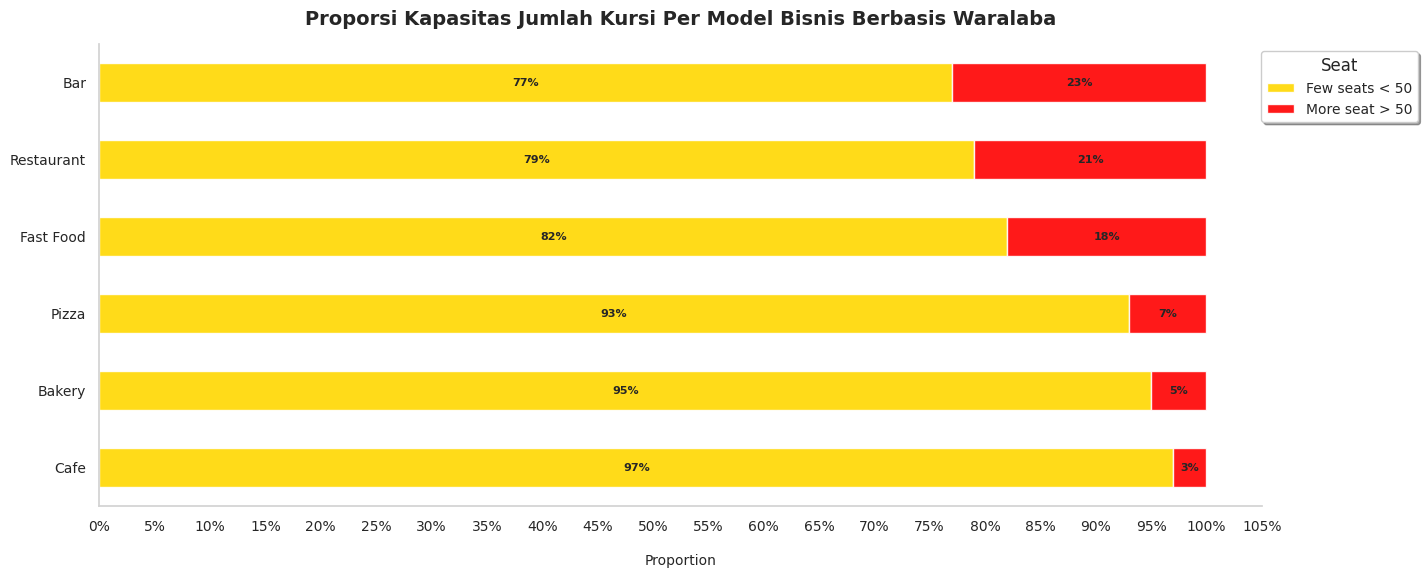

In [24]:
# membuat barchart bertumpuk (stacked=True)
fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
ax.set_facecolor("xkcd:white")
franchise_data_agg.plot.barh(stacked=True, ax=ax, alpha=.9, color=['gold', 'red'])

# mengatur tampilan estetika plot
sns.despine()
plt.grid(False, axis='y')
plt.grid(False, axis='x')
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.legend(['Few seats < 50', 'More seat > 50'],
           shadow=True,
           fancybox=True,
           title='Seat',
           facecolor='white',
           fontsize=10,
           bbox_to_anchor=(0, 0, 1.14, 1))

# mengatur tampilan sumbu x
ax.tick_params(labelsize=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.05))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))

# mengatur tampilan sumbu y
plt.ylabel('')
plt.xlabel('Proportion', labelpad=15, fontsize=10)
plt.title("Proporsi Kapasitas Jumlah Kursi Per Model Bisnis Berbasis Waralaba", fontsize=14, pad=14, fontweight='semibold')

# anotasi untuk setiap bar
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{width:.0%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, fontweight='bold')

plt.show()


**Kesimpulan :**


Setelah menganalisis data, kami menemukan dua temuan menarik. Pertama, terdapat fenomena dimana proporsi setiap jenis unit usaha dengan banyak kursi tidak melebihi 25%. Hal ini menunjukkan bahwa mayoritas usaha-usaha tersebut cenderung memiliki jumlah kursi yang terbatas. Kedua, terlihat bahwa usaha waralaba Cafe hampir mencapai 100% dalam proporsi jenis unit usaha dengan jumlah kursi sedikit. Artinya, hampir semua usaha waralaba Cafe memiliki jumlah kursi yang terbatas atau tidak lebih dari jumlah tertentu.

Kami akan melanjutkan dengan mengidentifikasi jumlah rata-rata kursi untuk setiap unit usaha

In [25]:
# identifikasi rata-rata jumlah kursi untuk setiap jenis unit usaha waralaba

avg_num_seats = rest_data[rest_data['chain'] == True].groupby('object_type')['number'].median().reset_index()
avg_num_seats = avg_num_seats.rename(columns={'object_type': 'jenis_usaha', 'number': 'rata-rata_jumlah_kursi'})
avg_num_seats = avg_num_seats.sort_values('rata-rata_jumlah_kursi', ascending=False)
avg_num_seats

,jenis_usaha,rata-rata_jumlah_kursi
5,Restaurant,28.0
3,Fast Food,24.0
2,Cafe,22.0
1,Bar,21.0
0,Bakery,18.0
4,Pizza,15.5


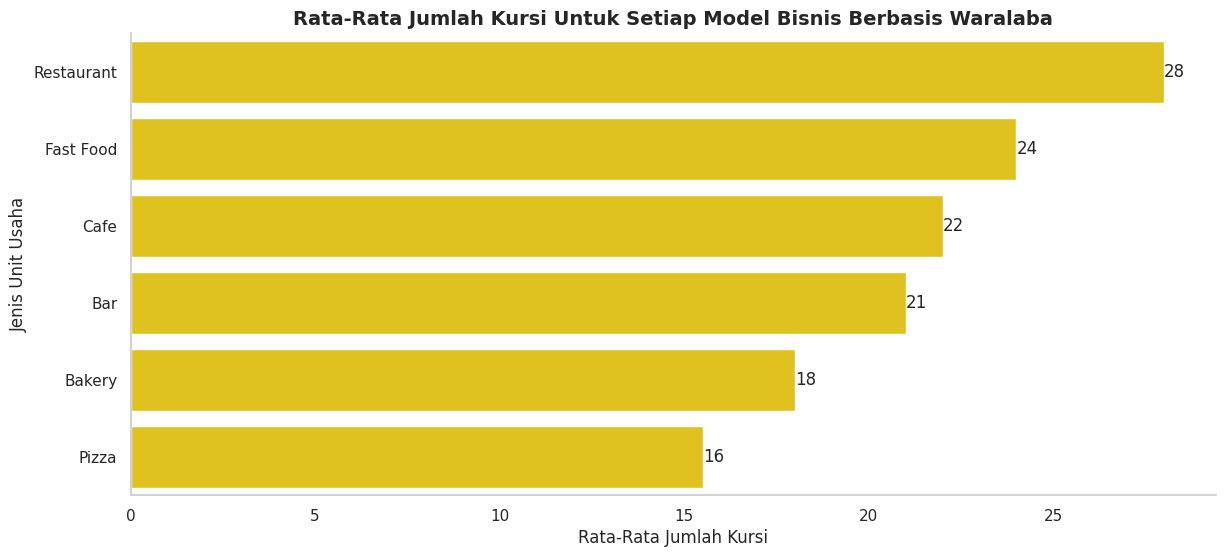

In [26]:
# memvisualiasi rata-rata jumlah kursi untuk setiap jenis unit usaha berbasis waralaba

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='rata-rata_jumlah_kursi', y='jenis_usaha', data=avg_num_seats, color='gold')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Rata-Rata Jumlah Kursi')
plt.ylabel('Jenis Unit Usaha')
ax.set_title('Rata-Rata Jumlah Kursi Untuk Setiap Model Bisnis Berbasis Waralaba', fontsize=14, fontweight='semibold')
sns.despine()
plt.grid(False, axis='x')

plt.show()

**Kesimpulan :**

Data menunjukkan bahwa rata-rata jumlah kapasitas kursi untuk semua jenis bisnis FnB di LA berkisar antara 16 hingga 28 kursi. Temuan ini dapat menjadi pertimbangan bagi manajemen ketika merencanakan bisnis baru, seperti Cafe. Sebagai saran, pertimbangkan agar Cafe tidak memiliki lebih dari 25 kursi.

## **Identifikasi Jenis Unit Usaha Berdasarkan Lokasi**

Berikut adalah beberapa contoh singkatan nama jalan umum di kota Los Angeles:
* ST - Street (Jalan)
* AVE - Avenue (Jalan Raya)
* BLVD - Boulevard (Boulevard)
* DR - Drive (Jalan Raya)
* WAY - Way (Jalan)
* GLEN - Glen (Lembah)
* PARK - Park (Taman)

Kami akan menggunakan informasi tersebut untuk memindahkan data nama jalan dari kolom address ke kolom terpisah (location).

In [27]:
# buat fungsi untuk memindahkan data nama jalan dari kolom address ke kolom terpisah

loc_split = ['ST', 'AVE', 'BLVD', 'DR', 'WAY', 'GLEN', 'PARK']

def make_column(address):
    words_split = address.split()      # pisahkan kata-kata dalam address dan simpan dalam variabel words_split
    loc = ''                           # variabel string kosong untuk menyimpan nama jalan
    for words in words_split[:]:       # iterasi setiap word dalam words_split[:]
        if words.isnumeric():
            words_split.remove(words)  # Jika words bersifat numerik, maka words tersebut dihapus dari words_split
        elif not len(words) > 1:
            words_split.remove(words)  # Jika words memiliki panjang <= 1, maka word tersebut dihapus dari words
        elif words in loc_split:
            loc += words               # Jika words terdapat dalam daftar loc_split, tambahkan words ke variabel loc
            break
        else:
            loc += words + ' '         # Jika tidak memenuhi kondisi di atas, tambahkan words ke loc dengan menambahkan spasi setelahnya
    return loc

In [28]:
# tambahkan kolom location ke dataframe rest_data

rest_data['location'] = rest_data['address'].apply(make_column)
rest_data.head()

,id,object_name,address,chain,object_type,number,seat_category,location
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,few seats <= 50,EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,few seats <= 50,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,few seats <= 50,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,few seats <= 50,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,few seats <= 50,ECHO PARK


In [29]:
# identifikasi jumlah unit usaha berdasarkan location
rest_loc = rest_data.groupby('location', sort=False, as_index=False)['address'].count().sort_values('address', ascending=False)
rest_loc.columns = ['location', 'number_of_unit']
rest_loc.head(10)

,location,number_of_unit
11,WILSHIRE BLVD,394
3,SUNSET BLVD,392
24,PICO BLVD,366
9,WESTERN AVE,360
22,FIGUEROA ST,330
25,OLYMPIC BLVD,306
74,VERMONT AVE,283
117,SANTA MONICA BLVD,264
18,3RD ST,254
2,HOLLYWOOD BLVD,252


In [30]:
rest_loc.tail(10)

,location,number_of_unit
369,PALMETTO ST,1
368,17TH ST,1
367,BROADWAY 4CC/1,1
365,MANSFIELD AVE,1
362,1/2 SAN FERNANDO RD,1
361,SAN FERNANDO RD STE,1
357,BROADWAY D3,1
356,96TH ST,1
353,1/2 WHITTIER BLVD,1
658,TEMPLE AVE,1


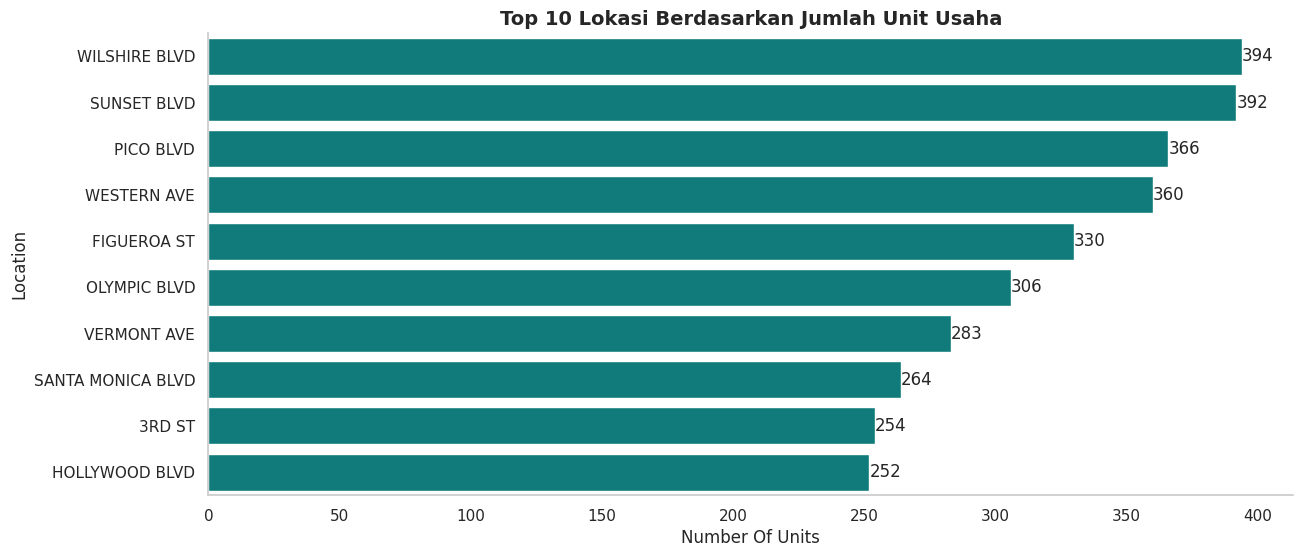

In [31]:
# menampilkan grafik 10 nama jalan teratas berdasarkan jumlah usaha

top_10_restloc = rest_loc.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='number_of_unit', y='location', data=top_10_restloc, color='darkcyan')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Number Of Units')
plt.ylabel('Location')
ax.set_title('Top 10 Lokasi Berdasarkan Jumlah Unit Usaha', fontsize=14, fontweight='semibold')
sns.despine()
plt.grid(False, axis='x')

plt.show()

**Kesimpulan :**

Dengan total 200 - 400 jumlah unit usaha yang berada di sepanjang lokasi ini, perusahaan mungkin dapat mempertimbangkan apabila memang berencana untuk masuk ke pasar yang kompetitif.

Namun kami juga memberikan sejumlah lokasi alternatif dengan tingkat kompetitor yang sangat rendah

In [32]:
# Temukan jumlah lokasi yang masing-masing hanya memiliki satu unit usaha

print('Jumlah total lokasi:', rest_data['location'].nunique(), 'lokasi')
print('Lokasi dengan hanya 1 unit usaha:', rest_loc.query('number_of_unit == 1')['number_of_unit'].count(), 'lokasi')
print('Lokasi dengan hanya 1 unit usaha (%)', round((rest_loc.query('number_of_unit == 1')['number_of_unit'].count())/(rest_data['location'].nunique()),3))

Jumlah total lokasi: 659 lokasi
Lokasi dengan hanya 1 unit usaha: 328 lokasi
Lokasi dengan hanya 1 unit usaha (%) 0.498


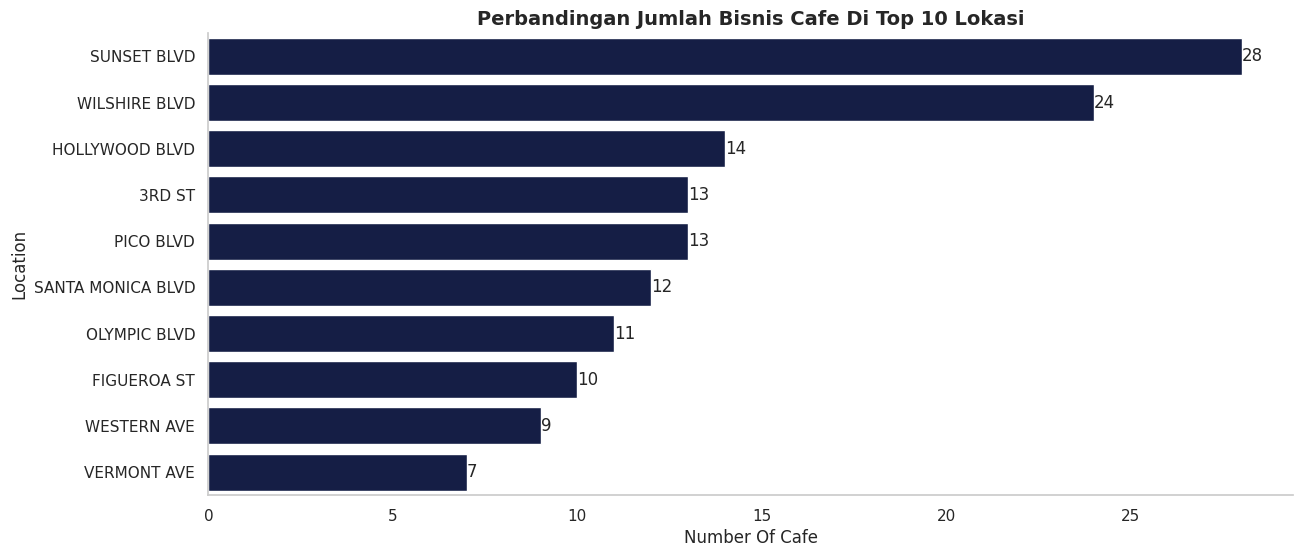

In [33]:
# ambil baris-baris data yang memuat kondisi berupa 10 lokasi teratas untuk jumlah bisnis
locations = top_10_restloc['location'].tolist()
top_10_data = rest_data.query("location in @locations")

# kelompokkan jumlah kafe berdasarkan top10 lokasi
cafe_agg = top_10_data[top_10_data['object_type'] == 'Cafe'].groupby('location')['id'].count().reset_index()
cafe_agg = cafe_agg.sort_values('id', ascending=False)

# identifikasi Perbandingan Jumlah Unit Usaha cafe untuk setiap top 10 location
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='id', y='location', data=cafe_agg, color=(0.05, 0.1, 0.3))

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Number Of Cafe')
plt.ylabel('Location')
ax.set_title('Perbandingan Jumlah Bisnis Cafe Di Top 10 Lokasi', fontsize=14, fontweight='semibold')
sns.despine()
plt.grid(False, axis='x')

plt.show()

Total number of cafes: 435
Number of cafes in the busiest locations: 141
Percentage of cafes in the busiest locations: 32.41%




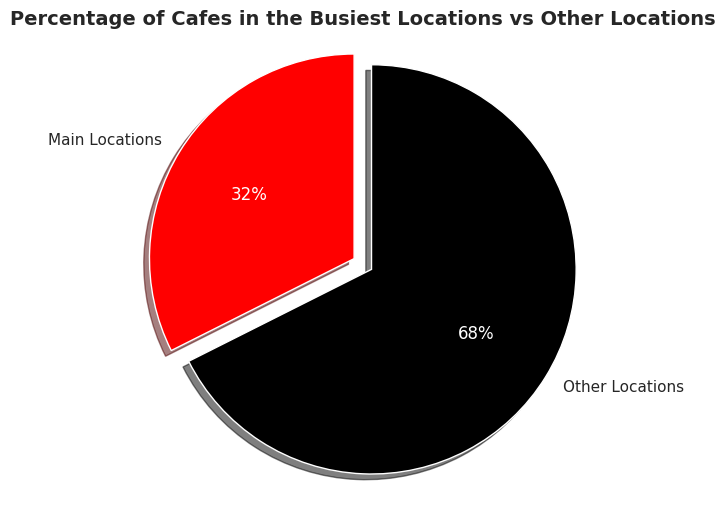

In [34]:
# Identifying the total number of cafes vs the number of cafes in the busiest locations in LA
total_cafe = rest_data.query("object_type == 'Cafe'")['id'].count()
print('Total number of cafes:', total_cafe)

top_10_restloc = rest_loc.head(10)
locations = top_10_restloc['location'].tolist()
jumlah_cafe = rest_data.query("location in @locations and object_type == 'Cafe'")['id'].count()
print('Number of cafes in the busiest locations:', jumlah_cafe)
percentage = round((jumlah_cafe / total_cafe) * 100, 2)
print('Percentage of cafes in the busiest locations: {}%'.format(percentage))
print()
print()

# Visualizing the number of cafes in the busiest locations vs other locations
labels = ['Main Locations', 'Other Locations']
sizes = [jumlah_cafe, total_cafe - jumlah_cafe]
colors = ['red', 'black']
explode = (0.1, 0)

# Creating the pie chart with shadows
fig, ax = plt.subplots(figsize=(6, 6))
_, _, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, shadow=True)
for autotext in autotexts:
    autotext.set_color('white')
ax.axis('equal')
ax.set_title('Percentage of Cafes in the Busiest Locations vs Other Locations', fontsize=14, fontweight='semibold')

# Displaying the pie chart
plt.show()

## **Distribusi Jumlah Kursi Untuk Lokasi Dengan Banyak Unit Usaha**

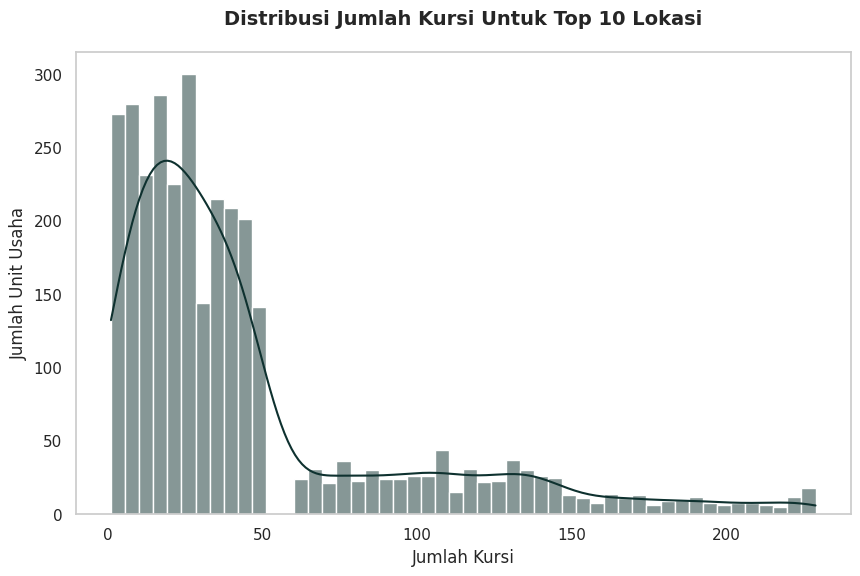

In [35]:
# membuat subset 'df_top_10' berisi data yang memiliki nilai dari kolom 'location' pada dataframe top_10_restloc
df_top_10 = rest_data.query('location in @rest_loc.location.head(10).tolist()')

# Membuat plot distribusi jumlah kursi
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_10, x='number', bins=50, kde=True, color='#0E312f')
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Unit Usaha')
plt.title('Distribusi Jumlah Kursi Untuk Top 10 Lokasi', fontsize=14, pad=20, fontweight='semibold')
plt.grid(False)  # Menghilangkan grid
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x600 with 0 Axes>

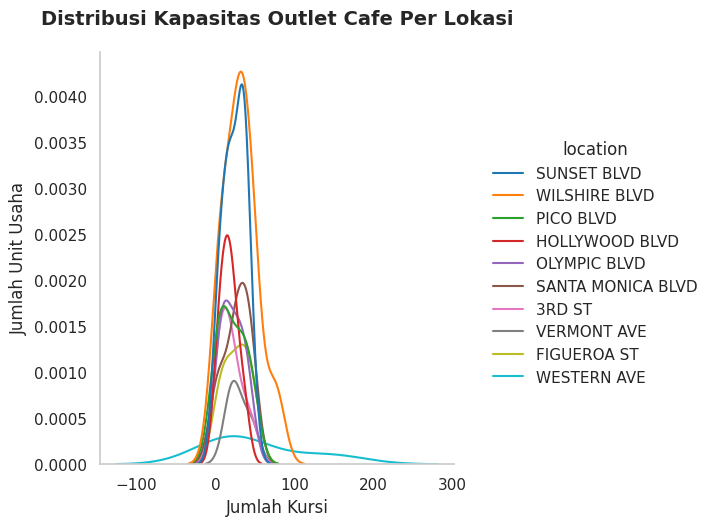

In [36]:
# Distribusi Kapasitas Jumlah Kursi Cafe Untuk Setiap Lokasi Potensial

df_top_10_cafe = df_top_10[(df_top_10["object_type"] == "Cafe") & (df_top_10["chain"] == True)]

plt.figure(figsize=(25, 6))
sns.displot(df_top_10_cafe, x="number", hue="location", kind="kde", palette="tab10")
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Unit Usaha')
plt.title('Distribusi Kapasitas Outlet Cafe Per Lokasi', fontsize=14, pad=20, fontweight='semibold')
plt.grid(False)  # Menghilangkan grid
plt.show()

**Kesimpulan :**

* Grafik menunjukkan adanya kesamaan dengan pola distribusi jumlah kursi secara keseluruhan. Hal ini mungkin saja akibat dari pertimbangan desain atau memaksimalkan ukuran ruangan di sebagian besar tempat makan.
* Sebagian besar kafe memiliki kapasitas jumlah kursi dibawah 100 kursi
* Western Ave merupakan lokasi jalan utama dengan satu-satunya kafe berbasis waralaba berkapasitas outlet besar

# **Kesimpulan Umum**

Dalam analisis ini, kami menggunakan data dari 9.651 bisnis di sektor makanan dan minuman (FnB) yang tersebar di 659 lokasi di Kota Los Angeles. Kami menganalisa 6 model bisnis utama, yaitu Restoran, Makanan Cepat Saji, Kafe, Pizzeria, Bar, dan Toko Roti. Hasil penelitian kami menunjukkan bahwa Restoran merupakan jenis bisnis yang paling kompetitif dan dominan di Los Angeles, dengan pangsa pasar FnB mencapai lebih dari 75%. Sementara itu, bisnis Makanan Cepat Saji dan Kafe berada di posisi kedua dan ketiga dengan pangsa pasar yang jauh lebih rendah, masing-masing hanya sekitar 11% dan 4.5%.

Mayoritas bisnis FnB di LA beroperasi sebagai waralaba, dengan persentase sekitar 62% dari keseluruhan jumlah total bisnis. Sisanya adalah bisnis independen (non-waralaba). Namun, dalam analisis kami, tidak ditemukan perbedaan yang signifikan antara bisnis waralaba dan non-waralaba dari segi kapasitas jumlah kursi yang tersedia di outlet. Sebagian besar bisnis FnB di LA memiliki skala bisnis yang relatif kecil, dengan rata-rata kapasitas outlet hanya untuk memuat sekitar 20 - 50 kursi. Meskipun begitu, terdapat juga sebagian kecil bisnis dengan kapasitas lebih dari 100 kursi, namun persentasenya cukup rendah, yaitu tidak mencapai 20% dari total keseluruhan bisnis di LA.

Ketika mempertimbangkan potensi dari model bisnis Kafe, kami menemukan beberapa fakta. Pertama, bahwa bisnis kafe menempati posisi kedua terbanyak di Los Angeles yang beroperasi dengan konsep waralaba, dengan tingkat persentase lebih dari 50% terhadap keseluruhan kafe yang ada di LA. Sebagian besar bisnis Kafe ini cenderung terpusat di area-area komersial, di mana kafe-kafe dengan skala kecil lebih banyak berbisnis di area boulevard seperti Sunset Boulevard dan Wilshire Boulevard. Sedangkan kafe dengan kapasitas yang lebih besar berkembang di sepanjang jalan utama Western Avenue, yang luas area-nya mencakup 29 mil.

Manajemen dapat mempertimbangkan untuk membangun bisnis kafe di lokasi semacam Figueroa Street untuk kafe berskala kecil atau Western Avenue untuk kafe berkapasitas besar. Kedua Lokasi ini termasuk kedalam 10 besar dalam hal jumlah tempat usaha, namun hanya terdapat tidak lebih dari 10 kafe yang eksis. Rekomendasi ini dapat menjadi strategi awal yang digunakan manajemen untuk meminimalkan kompetisi.

# **Tautan Ke PPT**

Presentasi: <https://drive.google.com/file/d/1sDL-5xHCBwTn2eOrRN9sVqD2OwVLZief/view?usp=drive_link>